### 1. 데이터 분석 준비, 데이터 확인

In [1]:
# 데이터 분석을 위한 라이브러리
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# csv 파일 불러오기
df = pd.read_csv("./exercise_dataset.csv")

# 데이터프레임의 크기 확인
print(df.shape)

# 데이터프레임 상위 5개 값 확인
df.head()

(246, 7)


,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg,weather influence
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730,1
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236,1
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974,1
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853,1
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825,1


In [3]:
# info 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Activity, Exercise or Sport (1 hour)  246 non-null    object 
 1   130 lb                                246 non-null    object 
 2   155 lb                                246 non-null    int64  
 3   180 lb                                246 non-null    int64  
 4   205 lb                                246 non-null    int64  
 5   Calories per kg                       246 non-null    float64
 6   weather influence                     246 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 13.6+ KB


곧, 모든 컬럼에 대해 결측치가 존재하지 않는다.

### 2. 결측치 확인하기

In [4]:
# 컬럼별 결측치 한번 더 확인해보기
df.isnull().sum()

Activity, Exercise or Sport (1 hour)    0
130 lb                                  0
155 lb                                  0
180 lb                                  0
205 lb                                  0
Calories per kg                         0
weather influence                       0
dtype: int64

### 3. 데이터 전처리하기

In [5]:
# Here the weight is 190 lb, you change the weight
weight = 190

# Let us assume that the exercise is cycling using a mountain bike (BMX) for 1 hour
# This exercise is at index 0 in df

print("Calories burned:", weight*df.iloc[0]["Calories per kg"] , "kcal")
print(df.iloc[0]["Calories per kg"])

Calories burned: 332.63864660999997 kcal
1.750729719


컬럼 "Calories per kg"에는 의미상 오류가 있음을 확인하자.

올바르게 고친다면, "Calories per lb" 가 되어야 한다. ( kcal = weight(lb) * kcal / lb )

또한 1kg = 2.205 lb 이므로, 몸무게가 kg으로 주어진다면, `kcal = weight(kg) * 2.205 * kcal / lb` 이다.

먼저, 칼럼명을 올바르게 수정하려고 한다.

In [6]:
df.rename(columns = {'Calories per kg':'Calories per lb'},inplace=True)
df.head()

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per lb,weather influence
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730,1
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236,1
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974,1
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853,1
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825,1


컬럼명이 올바르게 바뀌었음을 확인할 수 있다.

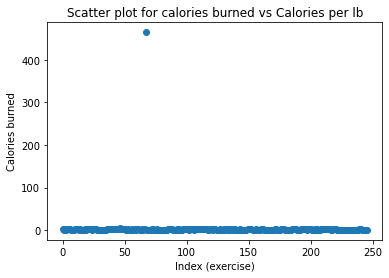

In [7]:
plt.scatter(df.index, df["Calories per lb"])
plt.xlabel("Index (exercise)")
plt.ylabel("Calories burned")
plt.title("Scatter plot for calories burned vs Calories per lb")
plt.show()

이상치가 존재함을 산점도를 통해 확인하였으므로, 이를 삭제하려고 한다.

In [8]:
# 이상치 인덱스를 찾기 위한 오름차순 정렬
df.sort_values('Calories per lb', ascending=False)

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per lb,weather influence
67,"Coaching: football, basketball, soccer??,236,2...","bowling)""",295,352,409,465.000000,1
46,"Running, 10.9 mph (5.5 min mile)",1062,1267,1471,1675,3.706591,1
215,"Cross country skiing, uphill",974,1161,1348,1536,3.397878,1
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974,1
186,"Skin diving, fast",944,1126,1308,1489,3.294974,1
...,...,...,...,...,...,...,...
68,Croquet,148,176,204,233,0.515199,1
229,"Mowing lawn, riding mower",148,176,204,233,0.515199,1
74,"Football or baseball, playing catch",148,176,204,233,0.515199,1
164,"Walking, under 2.0 mph, very slow",118,141,163,186,0.411618,1


In [9]:
# 67번째 행 삭제
df = df.drop([67])

df.sort_values('Calories per lb', ascending=False)

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per lb,weather influence
46,"Running, 10.9 mph (5.5 min mile)",1062,1267,1471,1675,3.706591,1
215,"Cross country skiing, uphill",974,1161,1348,1536,3.397878,1
186,"Skin diving, fast",944,1126,1308,1489,3.294974,1
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974,1
45,"Running, 10 mph (6 min mile)",944,1126,1308,1489,3.294974,1
...,...,...,...,...,...,...,...
68,Croquet,148,176,204,233,0.515199,1
229,"Mowing lawn, riding mower",148,176,204,233,0.515199,1
74,"Football or baseball, playing catch",148,176,204,233,0.515199,1
164,"Walking, under 2.0 mph, very slow",118,141,163,186,0.411618,1


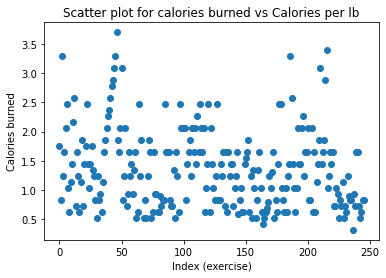

In [10]:
# 다시 산점도 그리기

plt.scatter(df.index, df["Calories per lb"])
plt.xlabel("Index (exercise)")
plt.ylabel("Calories burned")
plt.title("Scatter plot for calories burned vs Calories per lb")
plt.show()

이상치가 사라지자, 산점도가 고르게 분포되는 형태로 바뀐 것을 확인할 수 있다.

필요한 정보만을 남기고 데이터를 삭제하자.

In [11]:
data = df[["Activity, Exercise or Sport (1 hour)", "Calories per lb", "weather influence"]]
data.head()

,"Activity, Exercise or Sport (1 hour)",Calories per lb,weather influence
0,"Cycling, mountain bike, bmx",1.750730,1
1,"Cycling, <10 mph, leisure bicycling",0.823236,1
2,"Cycling, >20 mph, racing",3.294974,1
3,"Cycling, 10-11.9 mph, light",1.234853,1
4,"Cycling, 12-13.9 mph, moderate",1.647825,1


In [12]:
data.sort_values('Calories per lb', ascending=False)

,"Activity, Exercise or Sport (1 hour)",Calories per lb,weather influence
46,"Running, 10.9 mph (5.5 min mile)",3.706591,1
215,"Cross country skiing, uphill",3.397878,1
186,"Skin diving, fast",3.294974,1
2,"Cycling, >20 mph, racing",3.294974,1
45,"Running, 10 mph (6 min mile)",3.294974,1
...,...,...,...
68,Croquet,0.515199,1
229,"Mowing lawn, riding mower",0.515199,1
74,"Football or baseball, playing catch",0.515199,1
164,"Walking, under 2.0 mph, very slow",0.411618,1


In [13]:
# 날씨에 영향을 받는 운동 / 영향을 받지 않는 운동 확인하기
outdoor = data[data['weather influence'] == 1]

# 날씨에 영향을 받는 운동의 수
len(outdoor)

outdoor.head()

,"Activity, Exercise or Sport (1 hour)",Calories per lb,weather influence
0,"Cycling, mountain bike, bmx",1.750730,1
1,"Cycling, <10 mph, leisure bicycling",0.823236,1
2,"Cycling, >20 mph, racing",3.294974,1
3,"Cycling, 10-11.9 mph, light",1.234853,1
4,"Cycling, 12-13.9 mph, moderate",1.647825,1


In [14]:
indoor = data[data['weather influence'] == 0]

# 날씨에 영향을 받지 않는 운동의 수
len(indoor)

indoor.head()

,"Activity, Exercise or Sport (1 hour)",Calories per lb,weather influence
8,"Stationary cycling, very light",0.617427,0
9,"Stationary cycling, light",1.132626,0
10,"Stationary cycling, moderate",1.441339,0
11,"Stationary cycling, vigorous",2.162348,0
12,"Stationary cycling, very vigorous",2.574642,0


In [15]:
# 날씨에 영향을 받는 운동의 수
len(outdoor)

143

In [16]:
# 날씨에 영향을 받지 않는 운동의 수
len(indoor)

102

In [17]:
print('Calories per lb' in indoor.columns)

True
